In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 상현_쓰레기데이터 EDA

In [4]:
waste = pd.read_csv('DB/상현_폐기물데이터_행정구역변경(수정).csv', encoding='CP949')

In [5]:
waste

,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
0,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,0.0,9125.0,4672.0,0.0,13797.0,2019
1,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,5365.5,2737.5,0.0,8103.0,2019
2,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,0.0,182.5,73.0,0.0,255.5,2019
3,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,511.0,255.5,0.0,766.5,2019
4,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,693.5,365.0,0.0,1058.5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
42471,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐전기전자제품,NaN,1027.6,0.0,0.0,0.0,1027.6,2023
42472,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐가구류,NaN,0.0,0.0,0.0,0.0,0.0,2023
42473,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,기타,NaN,200.0,0.0,0.0,0.0,200.0,2023
42474,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,재활용 잔재물,NaN,0.0,1627.4,718.0,0.0,2345.4,2023


# 폐기물_종류

In [68]:
waste_group_total = waste.groupby('폐기물_종류').agg({
  '재활용':['mean','sum'],
  '소각': ['mean','sum'],
  '매립':['mean','sum'],
  '기타':['mean','sum'],
  '발생량':['mean','sum']})

In [90]:
waste_group_total

재활용                       소각                      매립  \
                        mean         sum         mean         sum        mean   
폐기물_종류                                                                          
음식물류 폐기물 분리배출   19412.789983  22285882.9   282.001655    323737.9  182.094512   
재활용 가능자원  분리배출    819.164282  19748412.5    37.664601    908018.2    9.540932   
종량제방식 등 혼합배출      328.523223   5657169.9  1367.228066  23543667.3  628.123211   

                                    기타                     발생량              
                       sum        mean       sum          mean         sum  
폐기물_종류                                                                      
음식물류 폐기물 분리배출     209044.5  104.427178  119882.4  19981.313328  22938547.7  
재활용 가능자원  분리배출    230012.8    1.553932   37462.2    867.923747  20923905.7  
종량제방식 등 혼합배출    10816281.7   22.024977  379270.1   2345.899477  40396389.0

In [70]:
waste_group_total['발생량']['sum']/sum(waste_group_total['발생량']['sum'])
# 종량제방식 등 혼합배출이 0.4로 제일 많음
# 음식물류와 재활용은 비슷슷

폐기물_종류
음식물류 폐기물 분리배출     0.272239
재활용 가능자원  분리배출    0.248329
종량제방식 등 혼합배출      0.479432
Name: sum, dtype: float64

In [71]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

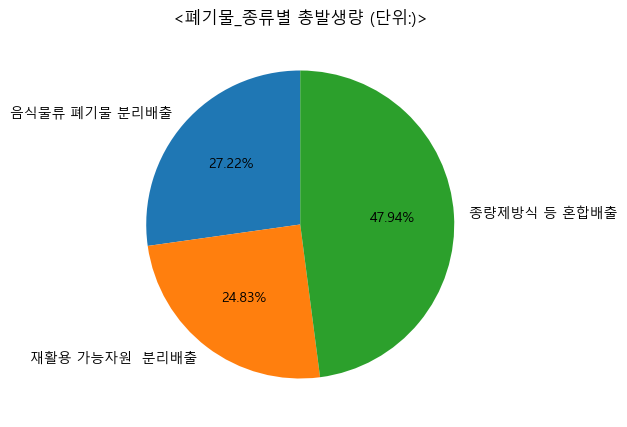

In [85]:
plt.figure(figsize=(10,5))

plt.pie(x = waste_group_total['발생량']['sum'],
        labels = waste_group_total.index,
        autopct='%.2f%%',
        startangle= 90 # 시계 반대방향
        )
plt.title('<폐기물_종류별 총발생량 (단위:)>')

plt.show()

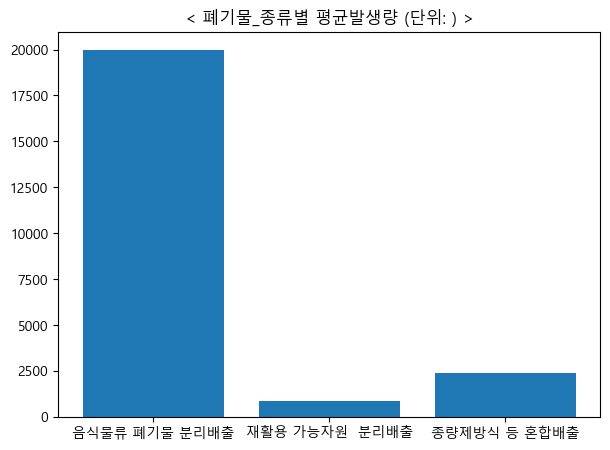

In [89]:
plt.figure(figsize=(7,5))
x = np.arange(len(waste_group_total.index))
y = waste_group_total['발생량']['mean'].to_list()

plt.bar(x, y)
plt.xticks(x, waste_group_total.index)
plt.title('< 폐기물_종류별 평균발생량 (단위: ) >')
plt.show()

# 음식물이 평균이 제일 높음음

### 폐기물_종류별 통계량

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10), sharey=True)

waste_group_total.

plt.title("폐기물_종류별 통계량")
plt.show()

TypeError: Bbox.from_bounds() missing 2 required positional arguments: 'width' and 'height'

In [95]:
waste_group_total

재활용                       소각                      매립  \
                        mean         sum         mean         sum        mean   
폐기물_종류                                                                          
음식물류 폐기물 분리배출   19412.789983  22285882.9   282.001655    323737.9  182.094512   
재활용 가능자원  분리배출    819.164282  19748412.5    37.664601    908018.2    9.540932   
종량제방식 등 혼합배출      328.523223   5657169.9  1367.228066  23543667.3  628.123211   

                                    기타                     발생량              
                       sum        mean       sum          mean         sum  
폐기물_종류                                                                      
음식물류 폐기물 분리배출     209044.5  104.427178  119882.4  19981.313328  22938547.7  
재활용 가능자원  분리배출    230012.8    1.553932   37462.2    867.923747  20923905.7  
종량제방식 등 혼합배출    10816281.7   22.024977  379270.1   2345.899477  40396389.0

In [ ]:
재활용	소각	매립	기타	발생량
mean	sum	mean	sum	mean	sum	mean	sum	mean	sum
폐기물_종류										
음식물류 폐기물 분리배출	19412.789983	22285882.9	282.001655	323737.9	182.094512	209044.5	104.427178	119882.4	19981.313328	22938547.7
재활용 가능자원 분리배출	819.164282	19748412.5	37.664601	908018.2	9.540932	230012.8	1.553932	37462.2	867.923747	20923905.7
종량제방식 등 혼합배출	328.523223	5657169.9	1367.228066	23543667.3	628.123211	10816281.7	22.024977	379270.1	2345.899477	40396389.0

In [ ]:
# 음식물 일단은 빼고 생각하기(?)

In [16]:
waste_group_main = waste.groupby(['행정구역','연도', '폐기물_종류']).agg({
  '재활용':'sum',
  '소각': 'sum',
  '매립':'sum',
  '기타':'sum',
  '발생량':'sum'})

In [17]:
waste_group_main.reset_index()

,행정구역,연도,폐기물_종류,재활용,소각,매립,기타,발생량
0,강원_강릉시,2019,음식물류 폐기물 분리배출,23104.5,0.0,0.0,0.0,23104.5
1,강원_강릉시,2019,재활용 가능자원 분리배출,25404.0,0.0,3394.5,0.0,28798.5
2,강원_강릉시,2019,종량제방식 등 혼합배출,0.0,1971.0,36974.5,0.0,38945.5
3,강원_강릉시,2020,음식물류 폐기물 분리배출,20548.0,0.0,0.0,0.0,20548.0
4,강원_강릉시,2020,재활용 가능자원 분리배출,14033.8,0.0,4307.0,0.0,18340.8
...,...,...,...,...,...,...,...,...
3439,충북_충주시,2022,재활용 가능자원 분리배출,14857.6,3727.2,0.0,0.0,18584.8
3440,충북_충주시,2022,종량제방식 등 혼합배출,0.0,36394.4,4925.3,0.0,41319.7
3441,충북_충주시,2023,음식물류 폐기물 분리배출,20445.3,0.0,0.0,0.0,20445.3
3442,충북_충주시,2023,재활용 가능자원 분리배출,14637.4,3355.3,0.0,0.0,17992.7


In [ ]:
waste.groupby(['행정구역','연도', '폐기물_종류']).agg()